<a href="https://colab.research.google.com/github/Karakamounika/CODSOFT/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-2
###sales prediction  by using machine learning in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Loading the  sales dataset

In [2]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#checking for outier with  visualization

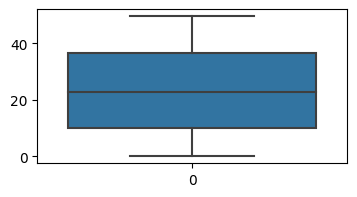

In [8]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

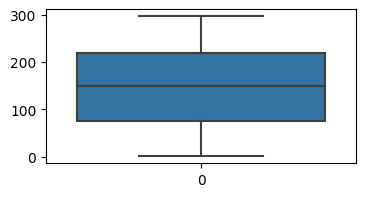

In [9]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

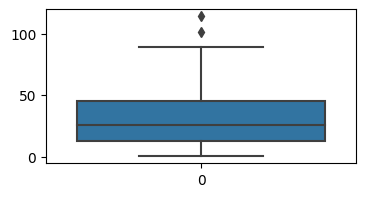

In [10]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

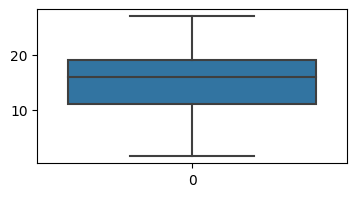

In [11]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

##In above graph , there is no outlier expect "newspaper"

In [12]:
IQR = df.Newspaper.quantile(0.75)  - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [13]:
df = df.copy()

In [14]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

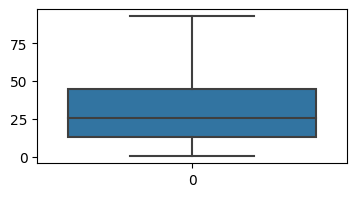

In [15]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

#Now  There is no outlier in dataset

<Axes: >

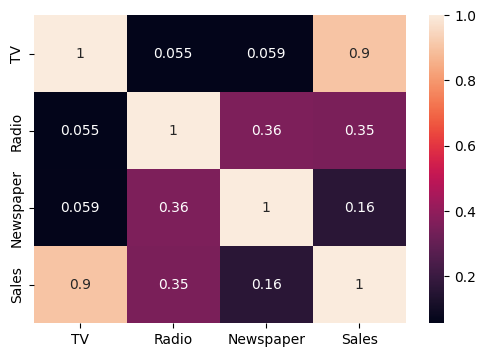

In [16]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

###All data set is numeric form now , we can train the model now

#Target Variable and feature

In [17]:
# Create matrix of features
x = df.drop('Sales', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Sales'] # y is the column we're trying to predict


In [18]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

###Model Training

In [19]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [20]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
x_train.shape

(134, 3)

In [22]:
x_test.shape

(66, 3)

In [23]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [24]:
y_train.shape

(134,)

In [25]:

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

#model predictions

In [26]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(66,)
[ 8.73993624 13.63549008  9.70533901 13.26372601  8.15474976 21.09157165
 10.74414829 10.00404624 10.10927572 12.72503923 21.97464467 13.72353134
 18.17446496 10.0651882  10.52775231 15.97638609 11.84562043 18.18133688
 19.2749307  18.34330462 12.25837861 16.37008491  8.28533872 15.8723838
 14.0283017   9.5120107  10.75756591 17.13487573 12.3031049  20.77448886
 16.77793814 19.3791013  20.63689918 11.66342112 14.9662805   8.79520587
 20.31825762  5.90824942 17.09023001 12.41564855 10.57785408 15.09521806
 15.32648668  8.79864542 15.71731666 21.20639753 20.35637191 12.52941996
 17.97280541 21.29066516 23.7090574  10.94506972  7.20386871 10.3336809
 19.48160073 10.61733342 18.33640031 11.71724746 17.41332431  8.14968895
 17.80862834  5.07962103 21.58106467  6.34491345 12.291046   15.35944891]


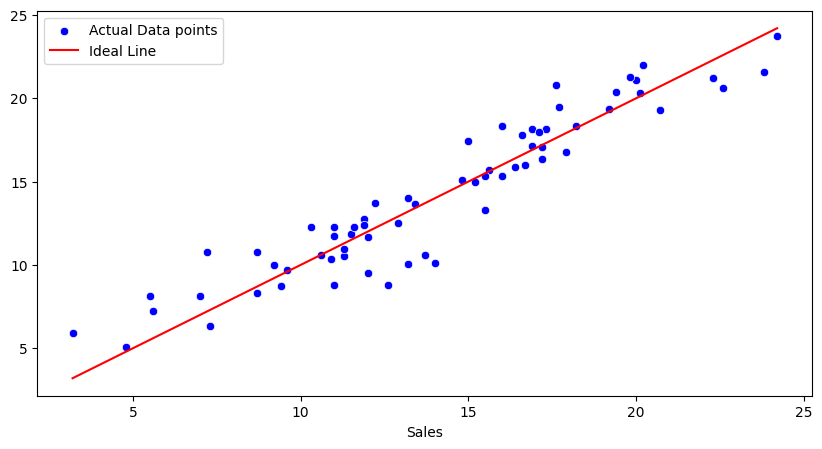

In [27]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [28]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          9.40 |          8.74
         13.40 |         13.64
          9.60 |          9.71
         15.50 |         13.26
          5.50 |          8.15
         20.00 |         21.09
          8.70 |         10.74
          9.20 |         10.00
         14.00 |         10.11
         11.90 |         12.73
         20.20 |         21.97
         12.20 |         13.72
         16.90 |         18.17
         13.20 |         10.07
         11.30 |         10.53
         16.70 |         15.98
         11.50 |         11.85
         17.30 |         18.18
         20.70 |         19.27
         16.00 |         18.34
         11.60 |         12.26
         17.20 |         16.37
          8.70 |          8.29
         16.40 |         15.87
         13.20 |         14.03
         12.00 |          9.51
          7.20 |         10.76
         16.90 |         17.13
         10.30 |         12.30
         17.60 |         20.77
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.


In [29]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ 6.76006376  1.86450992  5.79466099  2.23627399  7.34525024 -5.59157165
  4.75585171  5.49595376  5.39072428  2.77496077 -6.47464467  1.77646866
 -2.67446496  5.4348118   4.97224769 -0.47638609  3.65437957 -2.68133688
 -3.7749307  -2.84330462  3.24162139 -0.87008491  7.21466128 -0.3723838
  1.4716983   5.9879893   4.74243409 -1.63487573  3.1968951  -5.27448886
 -1.27793814 -3.8791013  -5.13689918  3.83657888  0.5337195   6.70479413
 -4.81825762  9.59175058 -1.59023001  3.08435145  4.92214592  0.40478194
  0.17351332  6.70135458 -0.21731666 -5.70639753 -4.85637191  2.97058004
 -2.47280541 -5.79066516 -8.2090574   4.55493028  8.29613129  5.1663191
 -3.98160073  4.88266658 -2.83640031  3.78275254 -1.91332431  7.35031105
 -2.30862834 10.42037897 -6.08106467  9.15508655  3.208954    0.14055109]


<Axes: ylabel='Density'>

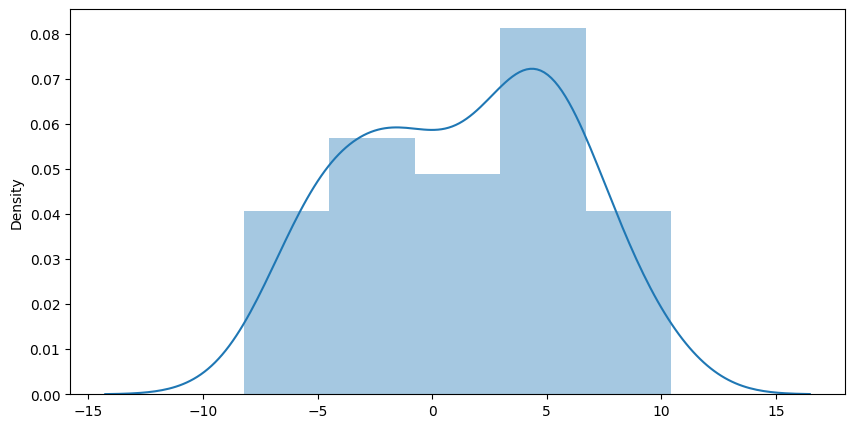

In [30]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

#Mean Squared error

In [31]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.8856656701479602
Mean Squared Error: 2.531820082679884
Root Mean Squared Error: 1.5911694072850584


#Descion Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.8856656701479602
Decision Tree Regression:  2.5589393939393936


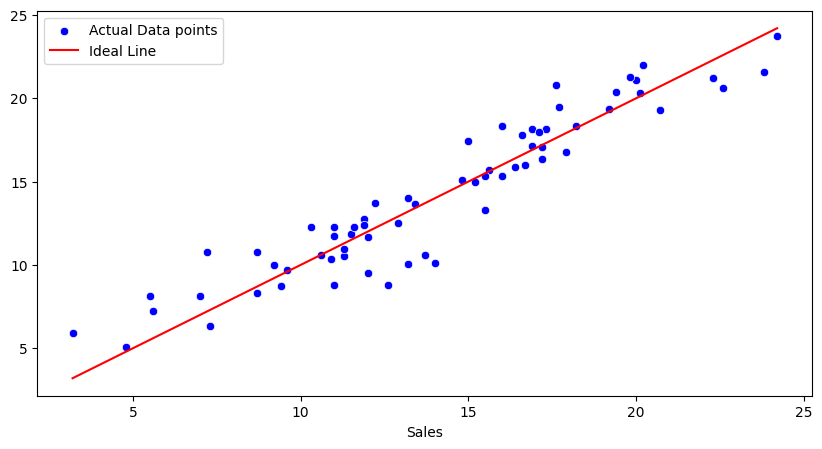

In [33]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()